# Measuring Park Capacity

---
## Getting the data
First, the data is imported, read, and previewed. Unnecessary data will be stripped and any NaN values will be disregarded later on.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("park_features.csv")
df = df[["center", "feature_name", "capacity"]]

df.sample(10)

,center,feature_name,capacity
378,Harrison Hills Park,Wake Robin Bathroom,NaN
206,South Park,Alabama,40.0
9,Boyce Park,Soccer Field 3,50.0
470,South Park,AED,NaN
263,White Oak Park,Cedar 2,42.0
248,South Park,Stone Manse,40.0
389,White Oak Park,Lower Dogwood Bathroom,NaN
337,White Oak Park,Cedar VolleyBall Court,NaN
450,South Park,Playground,NaN
138,North Park,Point,125.0


Now, we have a dataframe of name 'df' that contains only the park name, feature name, and feature capacity. This stripped down the data from the original imported csv file to only what is necessary in analyzing the capacities for each park.

---
### Analyzing the data
Next, an empty string will be made to be filled with all unique parks. A for loop is used to go through each row of the dataframe and grab each park name that isn't already in the string.

In [2]:
all_parks = [] # Empty string to hold all unique parks.

for row in range(len(df)): # For loop that appends park names if they are not in the list already.
    if df.iloc[row,0] not in all_parks:
        all_parks.append(df.iloc[row,0])

Next, an empty dictionary will be made. This dictionary will contain each park name as a key with their value storing the total capacity of the park. The total capacity of any park is determined by adding up the individual capacities of each park feature that is listed in the dataframe.

In [3]:
park_capacities = {} # Creating dictionary to hold all parks, where the value is the capacity of the park.

for park in all_parks: # Going through each park and adding the capacity of each unique feature.
    for row in range(len(df)):
        capacity = df.iloc[row,2]
        if df.iloc[row,0] == park and capacity == float(capacity): # Skipping park feature capacities that are not in the float data type. This excludes all NaN.
            if park in park_capacities: # Adding the key and value to the dictionary.
                park_capacities[park] += capacity
            else:
                park_capacities[park] = capacity

---
### Looking at the results
The dictionary can be printed out and the park with the highest capacity can be identified.

In [4]:
sorted_capacities = sorted(park_capacities.items(), key=lambda x:x[1])
park_capacities = dict(sorted_capacities)
for key in park_capacities:
    print("{0:30} {1}".format(key, park_capacities[key]))

Round Hill Park                580.0
Deer Lakes Park                585.0
White Oak Park                 1111.0
Harrison Hills Park            1130.0
Settler's Cabin Park           1140.0
Boyce Park                     1515.0
South Park                     4757.0
North Park                     6577.0
Hartwood Acres Park            10500.0


It's kind of hard to visualize the data in this format, so it will be plotted to get a better idea for how each park compares in capacity.

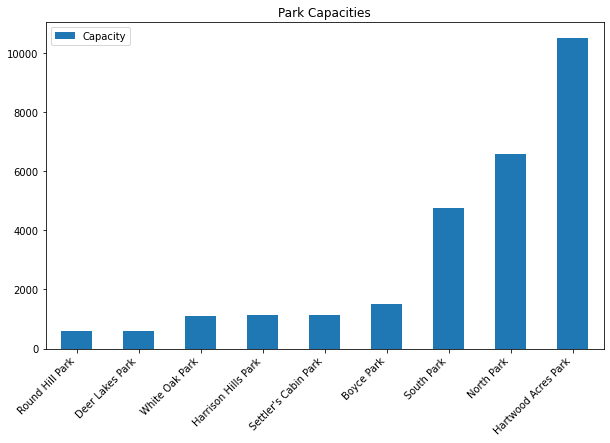

In [21]:
capacity = pd.DataFrame.from_dict(park_capacities, orient='index', columns=['Capacity']).sort_values(by='Capacity')
# Making a new dataframe with only park names and capacities.

capacity.plot(kind='bar', figsize =(10,6))
plt.title('Park Capacities')
plt.xticks(rotation=45, ha='right')
plt.show()

Looking at this bar graph, it is clear that Hartwood Acres Park has the highest capacity. Next, a way to score each park by their capacity is needed in order to utilize this as a sub-metric. This is done by giving a percentage for the park's capacity out of the park with the highest capacity, so Hartwood Acres Park would get a score of 100, being the best park in the submetric of capacity.

In [30]:
scores = {}
for park in park_capacities:
    scores[park] = round(((park_capacities[park]*100)/10500.0), 1)

print("Park Scores\n")
for i in scores:
    print("{0:30} {1}".format(i, scores[i]))

Park Scores

Round Hill Park                5.5
Deer Lakes Park                5.6
White Oak Park                 10.6
Harrison Hills Park            10.8
Settler's Cabin Park           10.9
Boyce Park                     14.4
South Park                     45.3
North Park                     62.6
Hartwood Acres Park            100.0


Each park is now scored with points. The points for each park will be used in the final judging of the best neigborhood in Pittsburgh, which will be done by adding all the points of every park within **a 30 minute drive** of each neighborhood and seeing which neighborhood has the most points in the end.